In [1]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.8/107.7 GB disk)


### Cheking the mode Yolov8



In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

2023-06-07 05:20:01.449693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 476k/476k [00:00<00:00, 31.2MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 60.9ms
Speed: 0.7ms pre-process, 60.9ms inference, 282.1ms postprocess per image at shape (1, 3, 640, 640)


## Custom Training

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Test
!ls

/content/drive/MyDrive/Test
data.yaml   README.dataset.txt	 runs  train  yolov8m.pt
output.mp4  README.roboflow.txt  test  valid


In [ ]:
#critical section
%cd /content/drive/MyDrive/Test

!yolo task=detect mode=train model=yolov8m.pt data= /content/drive/MyDrive/Test/data.yaml epochs=300 imgsz=640 plots=True

/content/drive/MyDrive/Test
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/drive/MyDrive/Test/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [4]:
from IPython.display import display, Image

#Image(filename='/content/drive/MyDrive/Test/runs/detect/train8/confusion_matrix.png', width=600)

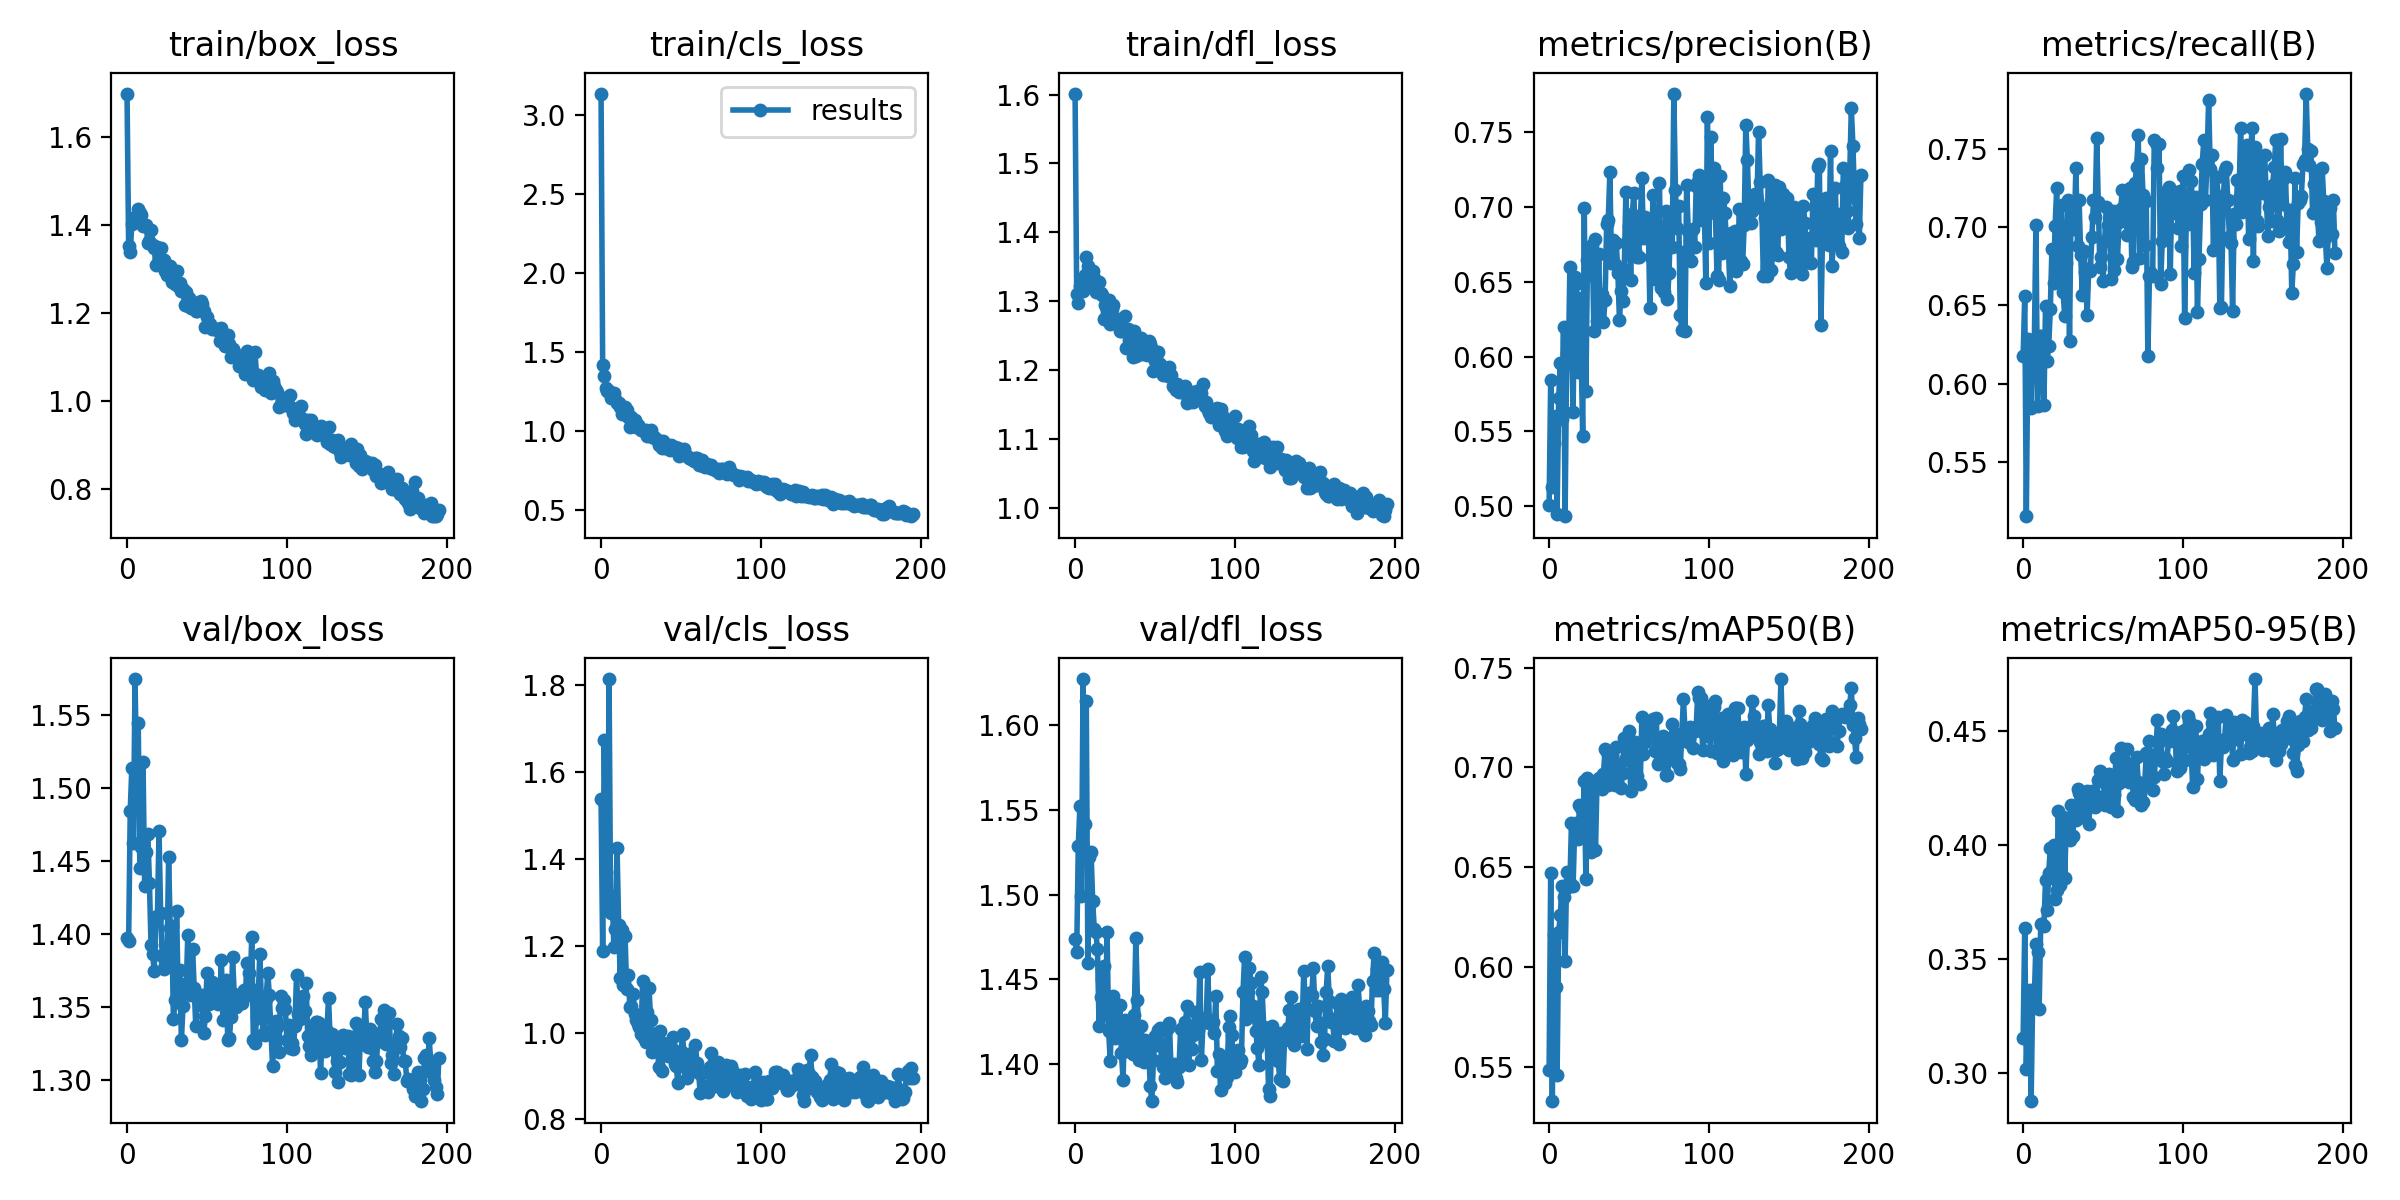

In [5]:
Image(filename='/content/drive/MyDrive/Test/runs/detect/train8/results.png', width=600)

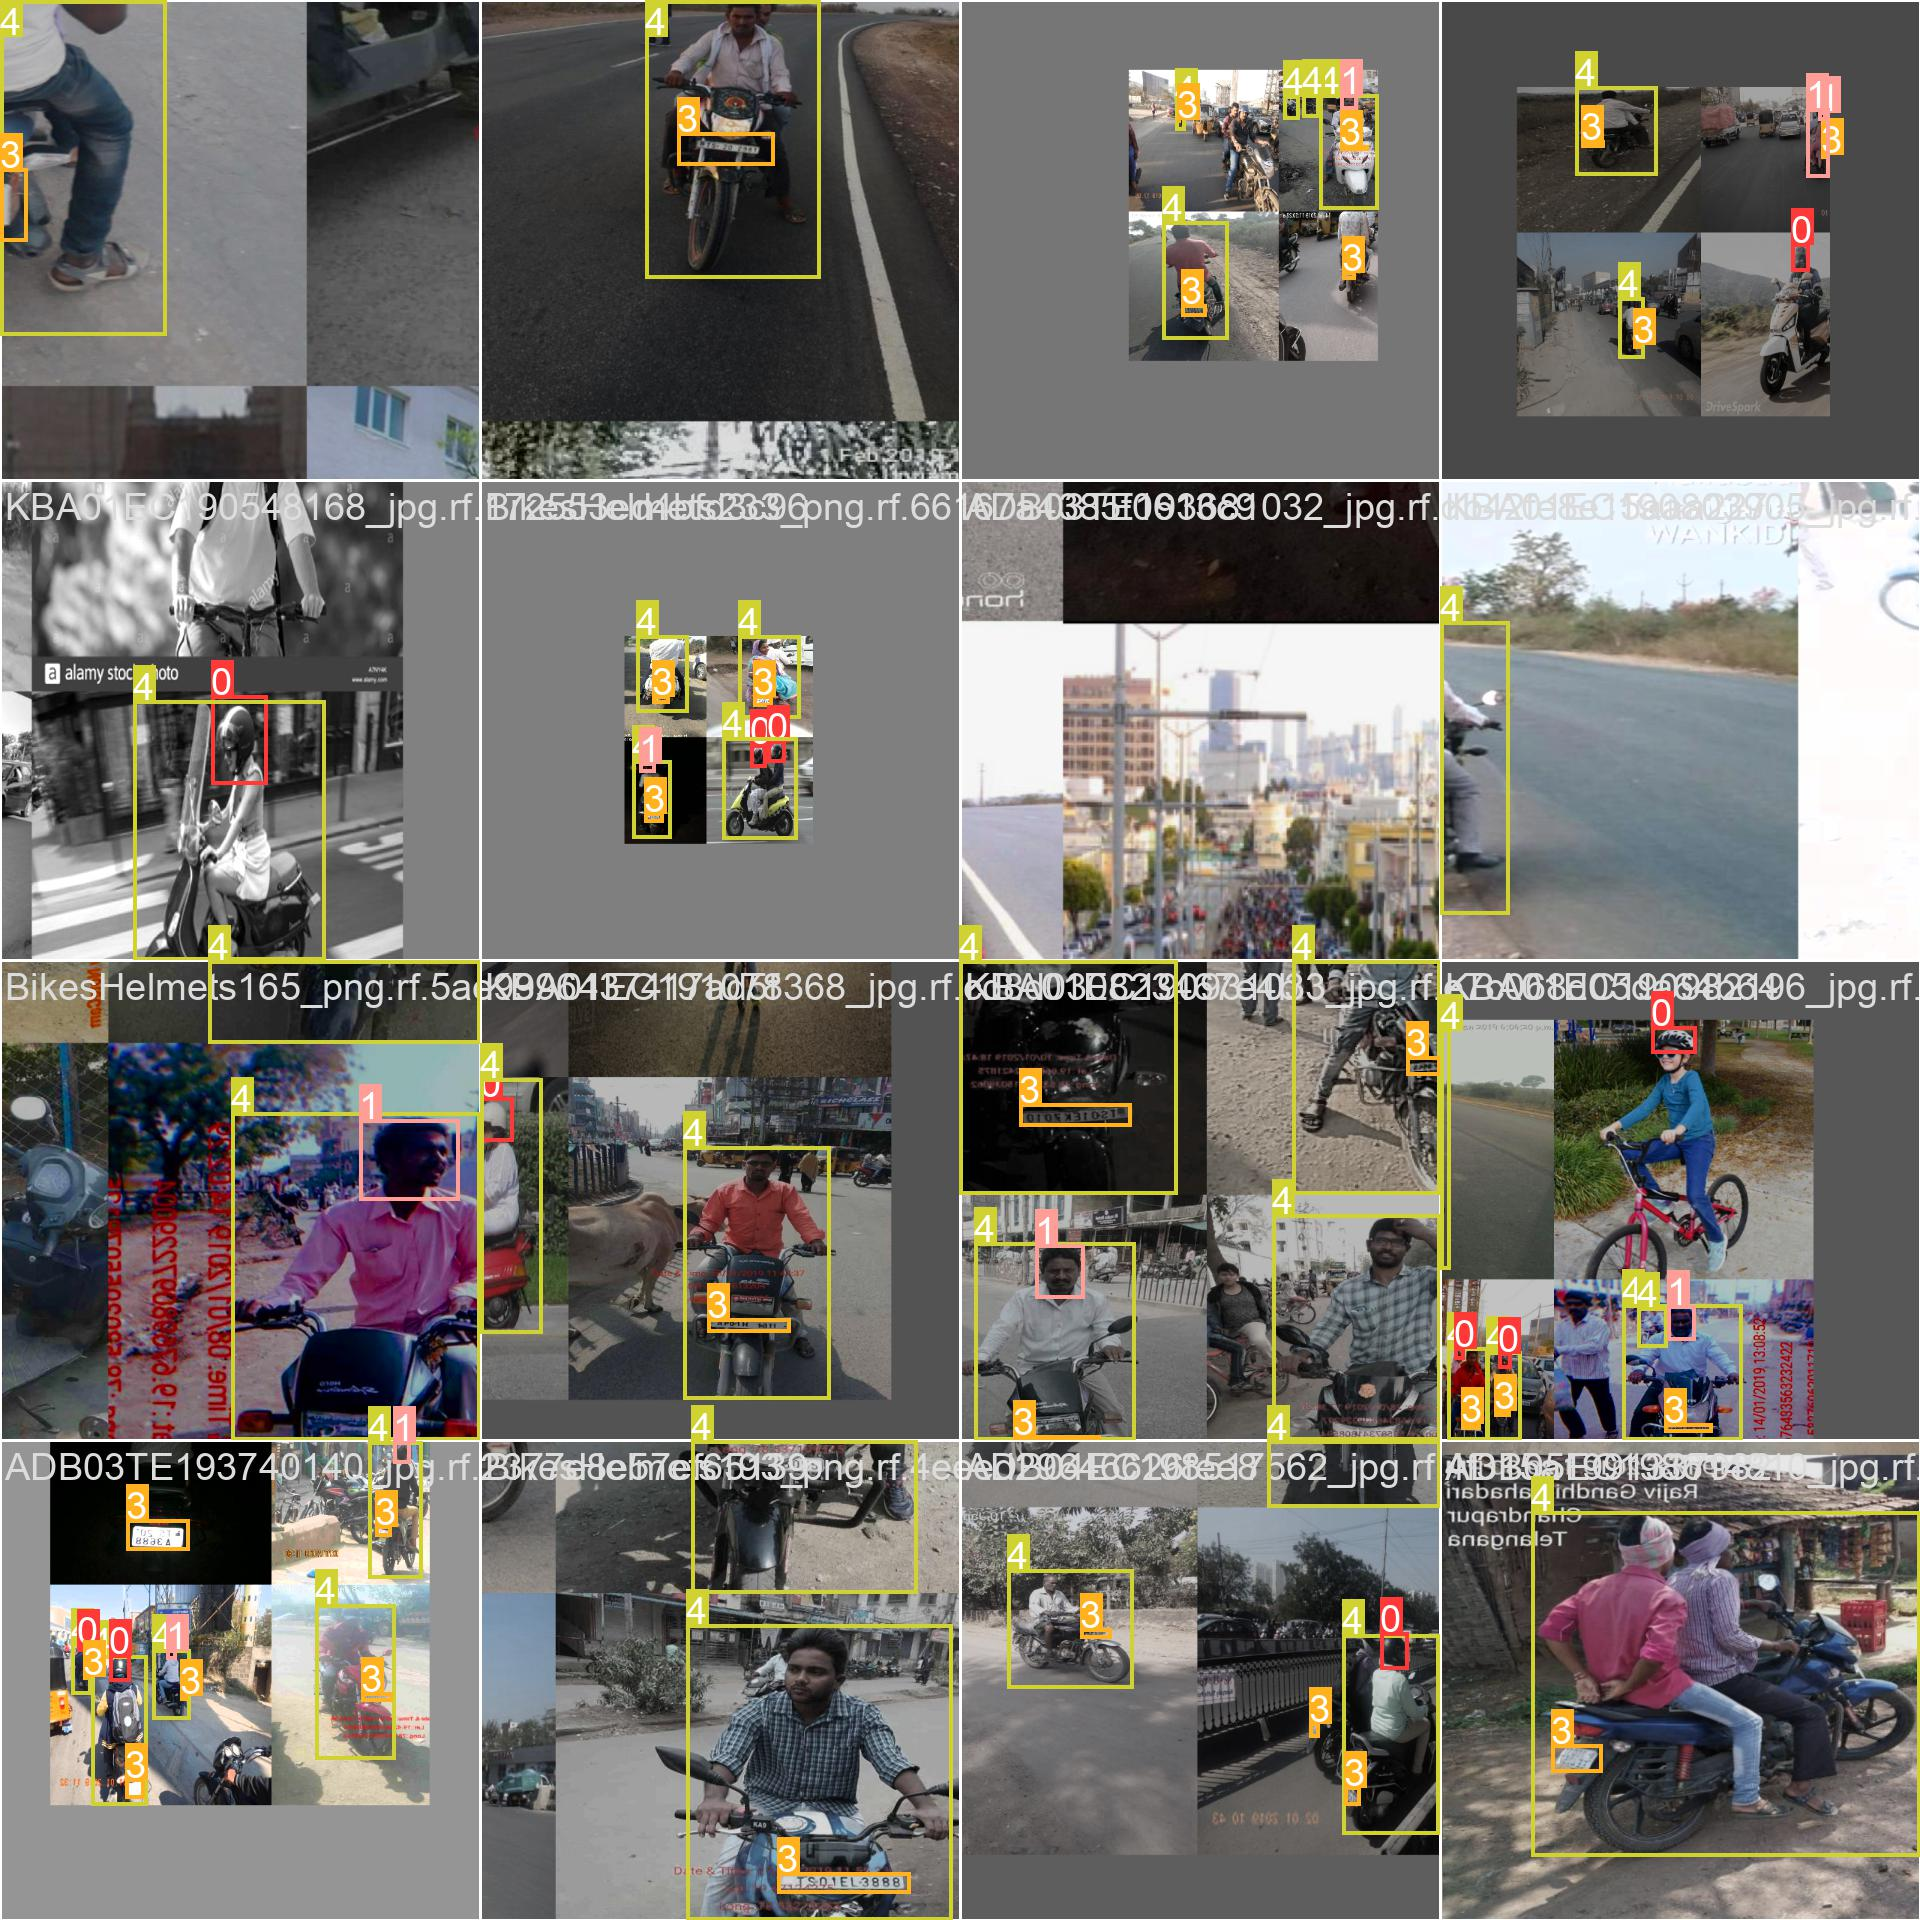

In [ ]:
Image(filename='/content/drive/MyDrive/Test/runs/detect/train8/train_batch0.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Test/runs/detect/train8/weights/best.pt data=data.yaml source=/content/drive/MyDrive/Test/valid

2023-06-08 23:34:26.798547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 23:34:28.291208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Test/valid/labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100% 218/218 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:09<00:00,  1.42it/s]
                   all        218        523      0.677      0.757      0.748      0.473
                helmet        218        132     

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Test/runs/detect/train8/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Test/runs/detect/TestImage save_conf=true save=true

2023-06-08 23:35:05.378233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 23:35:06.606632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
image 1/3 /content/drive/MyDrive/Test/runs/detect/TestImage/98-helmetless-two-wheeler.jpg: 384x640 2 helmets, 1 no_helmet, 3 plates, 4 riders, 65.3ms
image 2/3 /content/drive/MyDrive/Test/runs/detect/TestImage/aa-Cover-bm6libroec9o5e3959qtlv8rm6-20170112182333.jpeg: 384x640 2 helmets, 2 riders, 25.8ms
image 3/3 /content/drive/MyDrive/Test/runs/detect/TestImage/main-qimg-be4b12a039cc6adb2f7c90c

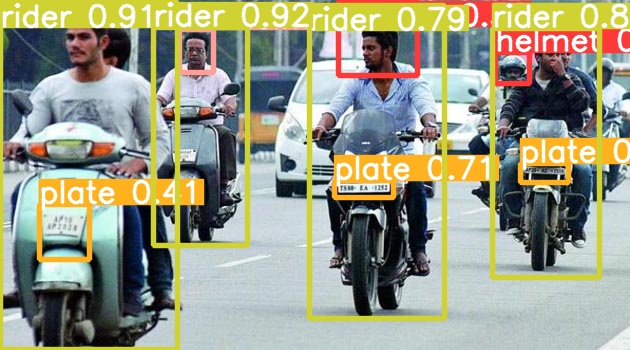

In [6]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/Test/runs/detect/predict7/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# **Real Time 1**

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Test/runs/detect/train8/weights/best.pt conf=0.25 source=/content/drive/MyDrive/VideoData/Bago_highway_1 save=true

2023-06-08 23:36:54.970047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 23:36:55.838487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
image 1/100 /content/drive/MyDrive/VideoData/Bago_highway_1/01.jpg: 384x640 101.0ms
image 2/100 /content/drive/MyDrive/VideoData/Bago_highway_1/02.jpg: 384x640 1 rider, 25.9ms
image 3/100 /content/drive/MyDrive/VideoData/Bago_highway_1/03.jpg: 384x640 2 riders, 25.9ms
image 4/100 /content/drive/MyDrive/VideoData/Bago_highway_1/04.jpg: 384x640 2 riders, 25.9ms
image 5/100 /content/drive/MyDrive

In [ ]:
import cv2
import os
from IPython.display import HTML
from base64 import b64encode
images_folder = '/content/drive/MyDrive/Test/runs/detect/predict8'
image_files = [file for file in os.listdir(images_folder) if file.endswith('.jpg') or file.endswith('.png')]
image_files.sort()
output_video = 'output.mp4'
first_image_path = os.path.join(images_folder, image_files[0])
first_image = cv2.imread(first_image_path)
height, width, _ = first_image.shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
video_writer = cv2.VideoWriter(output_video, fourcc, 24.0, (width, height))
for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    image = cv2.imread(image_path)
    video_writer.write(image)

video_writer.release()




# **Real Time 2**

In [7]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Test/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Test/runs/detect/Bago_urban_9 save=true

2023-06-09 09:25:38.831052: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 09:25:39.924402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
image 1/100 /content/drive/MyDrive/Test/runs/detect/Bago_urban_9/01.jpg: 384x640 1 rider, 1440.7ms
image 2/100 /content/drive/MyDrive/Test/runs/detect/Bago_urban_9/02.jpg: 384x640 4 riders, 2233.3ms
image 3/100 /content/drive/MyDrive/Test/runs/detect/Bago_urban_9/03.jpg: 384x640 4 riders, 1210.4ms
image 4/100 /content/drive/MyDrive/Test/runs/detect/Bago_urban_9/04.jpg: 384x640 1 plate, 3 riders, 807.0ms
image 5/100 /

In [8]:
import cv2
import os
from IPython.display import HTML
from base64 import b64encode
images_folder = '/content/drive/MyDrive/Test/runs/detect/predict9'
image_files = [file for file in os.listdir(images_folder) if file.endswith('.jpg') or file.endswith('.png')]
image_files.sort()
output_video = 'output.mp4'
first_image_path = os.path.join(images_folder, image_files[0])
first_image = cv2.imread(first_image_path)
height, width, _ = first_image.shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
video_writer = cv2.VideoWriter(output_video, fourcc, 24.0, (width, height))
for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    image = cv2.imread(image_path)
    video_writer.write(image)

video_writer.release()



In [9]:
!pip install opencv-python-headless
import cv2
from IPython.display import Image, display


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
predicted_video_path = "/content/drive/MyDrive/Test/output.mp4"  


In [ ]:
cap = cv2.VideoCapture(predicted_video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame to image format for display
    _, img_encoded = cv2.imencode('.jpeg', frame)
    display(Image(data=img_encoded))
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
